### Implementing Simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

#Reducer
from typing import Annotated
from langgraph.graph.message import add_messages

In [ ]:
# Reducer : this is a class that will be used to define the state of the graph
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [9]:
import os
from dotenv import load_dotenv
from langchain_groq import ChatGroq
load_dotenv()

groq_api_key = os.getenv("GROQ_API_KEY")

In [11]:
llm = ChatGroq(api_key=groq_api_key, model="Gemma2-9b-it")
response = llm.invoke("Hello world")
print(response.content)

Hello world! 👋 

How can I help you today? 😊



In [26]:
def superbot(state: State):
    return {
        "messages": [llm.invoke(state["messages"])]
    }

In [23]:
graph = StateGraph(State)
graph.add_node("Superbot", superbot)

graph.add_edge(START, "Superbot")
graph.add_edge("Superbot", END)

graph_builder = graph.compile()

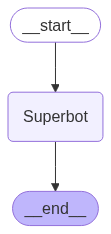

In [24]:
from IPython.display import display, Image

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [27]:
#Invoke the graph
graph_builder.invoke(
    {
        "messages": [
            "Hello my name is Ravi and I am a software engineer."
        ]
    }
)

{'messages': [HumanMessage(content='Hello my name is Ravi and I am a software engineer.', additional_kwargs={}, response_metadata={}, id='680b5bf3-f764-4406-8d6a-cb59bd429fb4'),
  HumanMessage(content="Hello Ravi, it's nice to meet you!  \n\nAs a software engineer, what kind of projects are you working on these days?  Anything exciting?\n", additional_kwargs={}, response_metadata={}, id='71109b34-db5a-406e-9927-7fb829081abc')]}

#### Streaming the  Responses

In [29]:
graph_builder.stream({"messages": ["Hello my name is Ravi and I am a software engineer."]})

<generator object Pregel.stream at 0x000002417E76A020>

In [ ]:
for event in graph_builder.stream({"messages": ["I am learning about Groq."]}, stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='I am learning about Groq.', additional_kwargs={}, response_metadata={}, id='0a8418b6-837b-44ba-9e19-a288368d8efe')]}
{'messages': [HumanMessage(content='I am learning about Groq.', additional_kwargs={}, response_metadata={}, id='0a8418b6-837b-44ba-9e19-a288368d8efe'), HumanMessage(content="That's great! Groq is a powerful and expressive query language specifically designed for interacting with content in the Contentful platform. \n\nLet me know what you'd like to learn about Groq. I can help you with:\n\n* **Basic concepts:** Understanding how Groq works, its syntax, and key components like variables, operators, and functions.\n* **Example queries:** Seeing how to retrieve specific content types, fields, and relationships using Groq.\n* **Advanced features:** Exploring powerful functionalities like filtering, sorting, limiting results, and nested queries.\n* **Best practices:** Learning how to write efficient and readable Groq queries for optimal per

In [34]:
for event in graph_builder.stream({"messages": ["I am learning about Groq."]}, stream_mode="updates"):
    print(event)

{'Superbot': {'messages': ["That's great! Groq is a powerful and intuitive query language designed specifically for interacting with content in a way that makes sense for the modern web. \n\n**Here are some key things to know about Groq:**\n\n* **It's designed for Content Management Systems (CMS):** Groq excels at querying and manipulating structured content, perfect for platforms like Contentful, Prismic, and Sanity.\n* **Graph-based:** Groq's syntax reflects the way content is often organized in a hierarchical, interconnected manner. \n* **Predictable and readable:** Groq aims for clarity and consistency, making it easier to understand and write queries than more traditional database languages.\n* **Powerful filtering and aggregation:** You can use Groq to filter content based on various criteria, group and summarize data, and perform complex calculations.\n* **Built-in date and text functions:** Groq provides handy functions for working with dates, strings, and other common data typ